In [1]:
import numpy as np
import torch
# from arsf_envi_reader import envi_header
import shutil
import os
import json
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr
from scipy.optimize import curve_fit
# from tqdm import tqdm
# import multiprocess as mp
from scipy import ndimage
from numpy import trapz

In [2]:
torch.cuda.is_available()

True

In [3]:
high_res_img = gdal.Open(r'D:\wenqu\mosaic\site2a\site2a_simulation_mosaic')
high_res_radiance = gdal.Open(r'D:\wenqu\mosaic\site2a\site2a_simulation_mosaic').ReadAsArray() 

high_res_radiance.shape

(122, 5218, 5519)

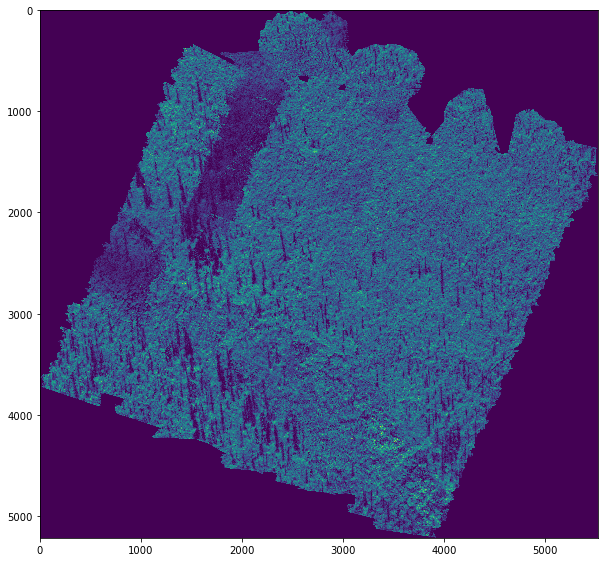

In [4]:
fig = plt.figure(figsize = (10,10))
plt.imshow(high_res_radiance[121,:,:], interpolation='nearest')
plt.show()

In [26]:
b122 = high_res_radiance[121, :, :]
b122_std = ndimage.generic_filter(b122, np.nanstd, size=(11,11), mode='constant', cval=np.NaN)


In [ ]:
b122_std.shape

In [27]:
b108 = high_res_radiance[107, :, :]
b108_std = ndimage.generic_filter(b108, np.nanstd, size=11, mode='constant', cval=np.NaN)
b108_mean = ndimage.generic_filter(b108, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [28]:
b4 = high_res_radiance[3, :, :]
b4_mean = ndimage.generic_filter(b4, np.nanmean, size=11, mode='constant', cval=np.NaN)
b4_std = ndimage.generic_filter(b4, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [29]:
b12 = high_res_radiance[11, :, :]
b12_std = ndimage.generic_filter(b12, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [30]:
b3 = high_res_radiance[2, :, :]
b3_std = ndimage.generic_filter(b3, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [15]:
b109 = high_res_radiance[108, :, :]
b109_mean = ndimage.generic_filter(b109, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [16]:
b109_mean.shape

(5218, 5519)

In [31]:
b105 = high_res_radiance[104, :, :]
b105_std = ndimage.generic_filter(b105, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [32]:
b107 = high_res_radiance[106, :, :]
b107_mean = ndimage.generic_filter(b107, np.nanmean, size=11, mode='constant', cval=np.NaN)
b107_std = ndimage.generic_filter(b107, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [33]:
b5 = high_res_radiance[4, :, :]
b5_mean = ndimage.generic_filter(b5, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [34]:
b110 = high_res_radiance[109, :, :]
b110_mean = ndimage.generic_filter(b110, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [35]:
b103 = high_res_radiance[102, :, :]
b103_std = ndimage.generic_filter(b103, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [36]:
b15 = high_res_radiance[14, :, :]
b15_mean = ndimage.generic_filter(b15, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [37]:
b120 = high_res_radiance[119, :, :]
b120_std = ndimage.generic_filter(b120, np.nanstd, size=11, mode='constant', cval=np.NaN)
b120_mean = ndimage.generic_filter(b120, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [38]:
b10 = high_res_radiance[9, :, :]
b10_std = ndimage.generic_filter(b10, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [39]:
b26 = high_res_radiance[25, :, :]
b26_std = ndimage.generic_filter(b26, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [40]:
b1 = high_res_radiance[0, :, :]
b1_mean = ndimage.generic_filter(b1, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [41]:
b75 = high_res_radiance[74, :, :]
b75_mean = ndimage.generic_filter(b75, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [42]:
b121 = high_res_radiance[120, :, :]
b121_mean = ndimage.generic_filter(b121, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [43]:
b2 = high_res_radiance[1, :, :]
b2_mean = ndimage.generic_filter(b2, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [44]:
b65 = high_res_radiance[64, :, :]
b65_std = ndimage.generic_filter(b65, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [45]:
b119 = high_res_radiance[118, :, :]
b119_mean = ndimage.generic_filter(b119, np.nanmean, size=11, mode='constant', cval=np.NaN)

In [46]:
b32 = high_res_radiance[31, :, :]
b32_std = ndimage.generic_filter(b32, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [47]:
b8 = high_res_radiance[7, :, :]
b8_std = ndimage.generic_filter(b8, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [48]:
b34 = high_res_radiance[33, :, :]
b34_std = ndimage.generic_filter(b34, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [49]:
b52 = high_res_radiance[51, :, :]
b52_std = ndimage.generic_filter(b52, np.nanstd, size=11, mode='constant', cval=np.NaN)

In [50]:
site2a_la_traitmap = (-0.64570444*b52_std - 0.83750744*b34_std + 0.83505827*b107_std - 0.99145006*b8_std -0.62330507*b32_std
                      + 0.06780459*b119_mean + 1.56084937*b65_std -0.85337594*b2_mean +0.42475524*b121_mean -0.64674977*b75_mean +0.78252502*b120_mean
                      -0.48933805*b1_mean +1.75513954*b26_std+0.17894097*b10_std +1.05435687*b120_std 
                      -0.53853918*b4_std
                      -1.27749178*b15_mean
                      -1.17019249*b103_std
                      -1.43608457*b110_mean
                      +0.92612388*b5_mean
                      +0.94560618*b107_mean
                      -1.25903758*b105_std
                      -0.87856942*b109_mean
                      -0.42104026*b3_std
                      +1.35965638*b12_std
                      +1.48255907*b108_mean
                      +1.17742143*b4_mean
                      -0.03216254*b108_std
                      -0.73239041*b122_std)

In [23]:
pj = high_res_img.GetProjection()  ## projection
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize

In [51]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2a_la_trait_map.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)

In [52]:
out_ds.GetRasterBand(1).WriteArray(site2a_la_traitmap)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

In [8]:
b_12_std = ndimage.generic_filter(b_12, np.nanstd, size=19, mode='constant', cval=np.NaN)
b_4_mean = ndimage.generic_filter(b_4, np.nanmean, size=19, mode='constant', cval=np.NaN)
b_1_mean = ndimage.generic_filter(b_1, np.nanmean, size=19, mode='constant', cval=np.NaN)


NameError: name 'b_122' is not defined

In [17]:
b_122 = high_res_radiance[121, :, :]

In [14]:
# b_122 = torch.from_numpy(b_122).cuda()

In [18]:
b122_std = ndimage.generic_filter(b_122, np.nanstd, size=19, mode='constant', cval=np.NaN)


In [19]:
b_108_std = ndimage.generic_filter(b_108, np.nanstd, size=19, mode='constant', cval=np.NaN)
b4_std = ndimage.generic_filter(b_4, np.nanstd, size=19, mode='constant', cval=np.NaN)
b3_std = ndimage.generic_filter(b_3, np.nanstd, size=19, mode='constant', cval=np.NaN)

In [20]:
site1b_LA = 0.24839608807373026*b_12_std + 0.2510314022329621*b_4_mean - 0.25162607625180117*b_1_mean +  0.2865569513069457*b_108_std - 0.3074071818024589*b122_std + 0.31396619530256276*b_108_std - 0.3394257254447247*b4_std - 0.3744722702068813*b3_std


In [ ]:
b_12_mean.shape

In [24]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2a_b109_mean.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)

In [25]:
out_ds.GetRasterBand(1).WriteArray(b109_mean)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

In [ ]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site1b_b4_mean.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(b_4_mean)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

In [ ]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site1b_b_1_mean.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(b_1_mean)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

In [ ]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site1b_b122_std.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(b122_std)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

In [ ]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site1b_b_108_std.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(b_108_std)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

In [ ]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site1b_b4_std.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(b4_std)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

In [ ]:
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site1b_b3_std.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(b3_std)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

In [ ]:
# site1b_LA
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site1b_LA.tiff"
outPath ='D:/wenqu/image_aggregation'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(site1b_LA)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds